In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\Project internship\salary.csv")

In [3]:
target = df.pop('salary')

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


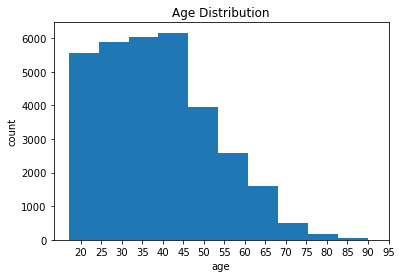

In [4]:
#Check age distribution

plt.hist(df['age'])
plt.xlabel('age')
plt.ylabel('count')
plt.rcParams['figure.figsize'] = (8,4)
plt.xticks(np.arange(20,100,5))
plt.title('Age Distribution')
plt.show()

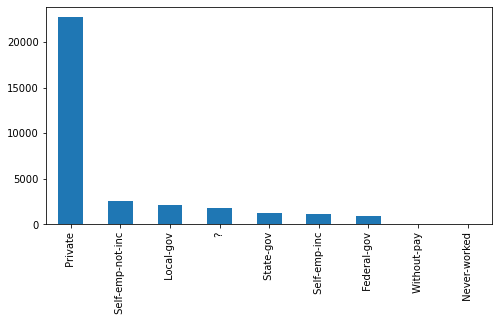

In [5]:
#Check Working class

df['workclass'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

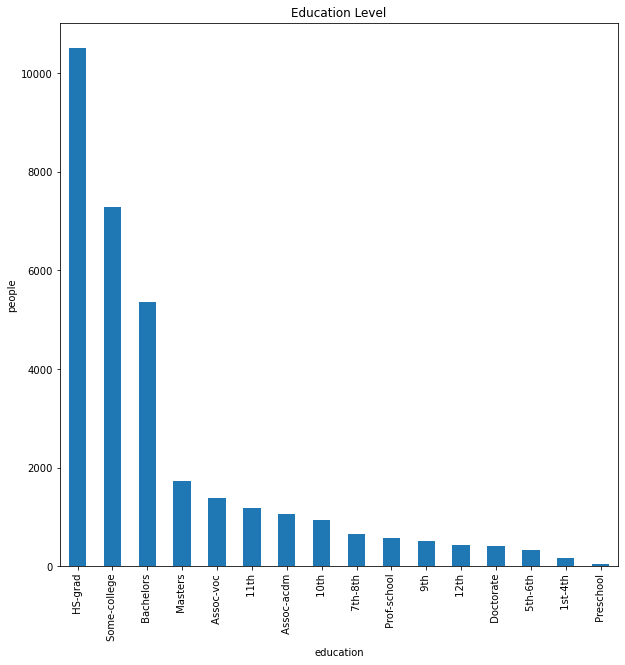

In [6]:
df['education'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (8,4)
plt.xlabel('education')
plt.ylabel('people')
plt.title('Education Level')
plt.show()

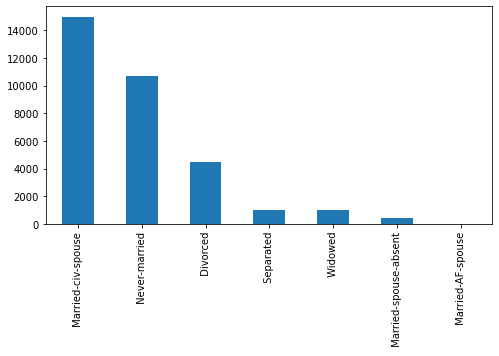

In [7]:
df['marital-status'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

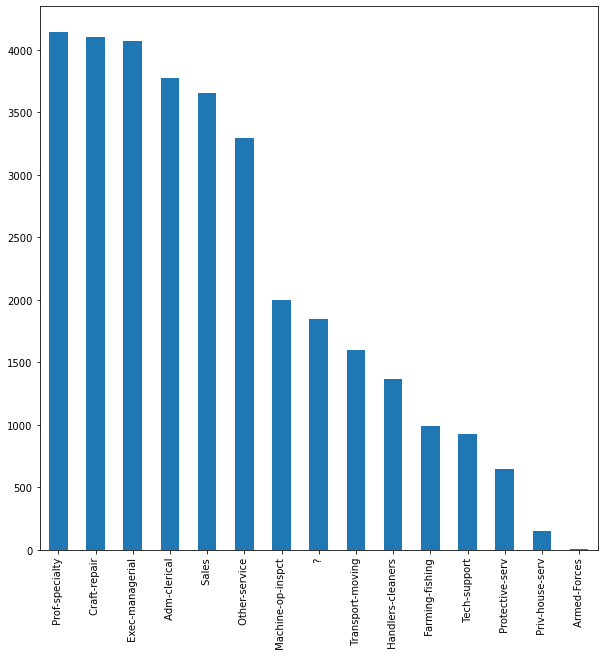

In [8]:
df['occupation'].value_counts().plot(kind = 'bar')
plt.show()


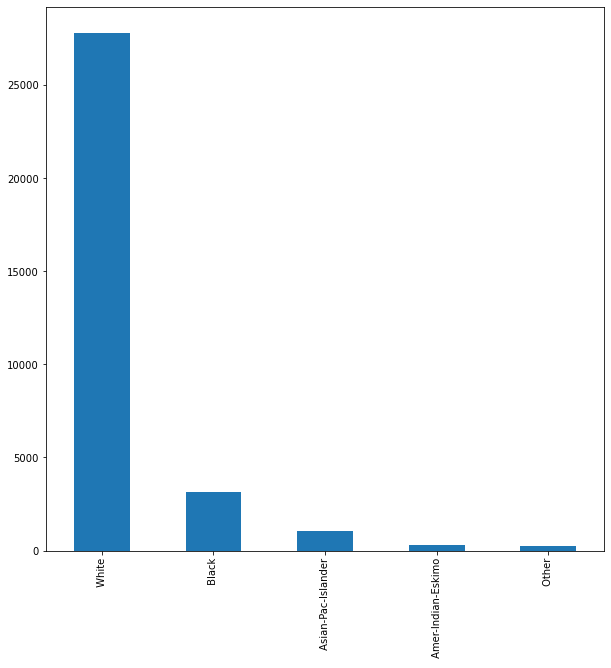

In [9]:
df['race'].value_counts().plot(kind = 'bar')
plt.show()

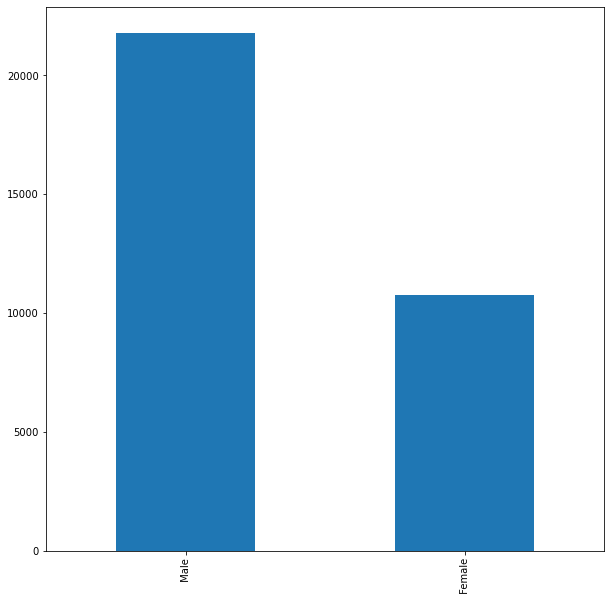

In [10]:
df['sex'].value_counts().plot(kind = 'bar')
plt.show()

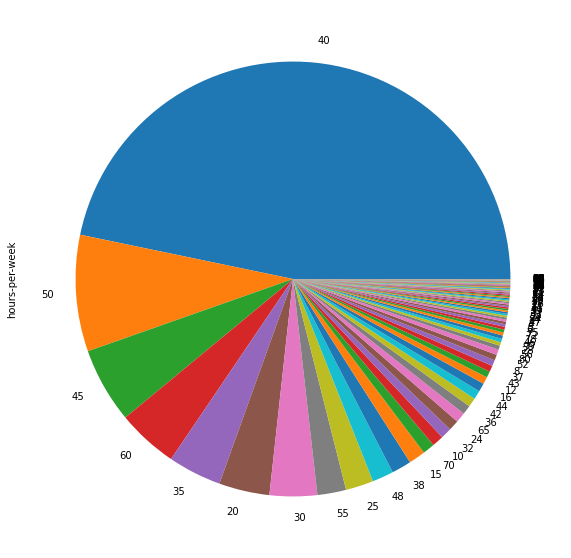

In [11]:
#Checking working hours

df['hours-per-week'].value_counts().plot(kind = 'pie')
plt.show()

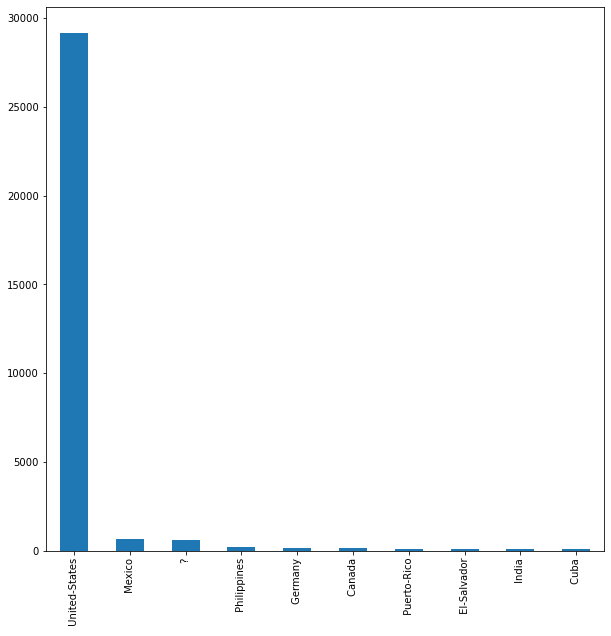

In [12]:
df['native-country'].value_counts().head(10).plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (7,5)
plt.show()

In [13]:
sorted(df.columns)

['age',
 'capital-gain',
 'capital-loss',
 'education',
 'education-num',
 'fnlwgt',
 'hours-per-week',
 'marital-status',
 'native-country',
 'occupation',
 'race',
 'relationship',
 'sex',
 'workclass']

In [14]:
#converting textual columns to numeric

char_cols = df.dtypes.pipe(lambda x: x[x == 'object']).index
label_mapping = {}
for c in char_cols:
    df[c], label_mapping[c] = pd.factorize(df[c])

In [15]:
# Removing columns with lesser significance[capital-gain , capital-loss]

df = df.drop(columns=['capital-gain','capital-loss'])
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,39,0,77516,0,13,0,0,0,0,0,40,0
1,50,1,83311,0,13,1,1,1,0,0,13,0
2,38,2,215646,1,9,2,2,0,0,0,40,0
3,53,2,234721,2,7,1,2,1,1,0,40,0
4,28,2,338409,0,13,1,3,2,1,1,40,1


In [16]:
#since this is a binary classification we will use logistic regression

#normalize the data
from sklearn.preprocessing import StandardScaler


df = StandardScaler().fit_transform(df.values)

#split the data

x_train , x_test, y_train , y_test = train_test_split(df, target)

clf = LogisticRegression().fit(x_train,y_train)
pred = clf.predict(x_test)

print('training complete')

training complete


In [17]:
# Generate Report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       <=50K       0.84      0.93      0.88      6240
        >50K       0.64      0.40      0.50      1901

    accuracy                           0.81      8141
   macro avg       0.74      0.67      0.69      8141
weighted avg       0.79      0.81      0.79      8141

